In [1]:
import sys
from sklearn.preprocessing import MinMaxScaler
sys.path.append("./../src/")

# Modules of src folder
import data_loader as dl
import run
import visualizations

## Prepare models

In [2]:
ueps = dl.load_ueps_data(from_raw=False)

In [3]:
# See run.py for meaning of these parameters
uk = False
shifts = [1,6,144]
non_nan_percentage = 70
col_to_be_lagged = ["power", "air_density", "sonic_wind_speed",
                    'air_pressure', 'wind_speed_cube2', 'air_temperature2',
                    'lidar_wind_speed2', 'wind_speed2', 'relative_humidity1',
                    'wind_speed_std2', 'wind_direction_std2']
                    
val_ratio = 0.2
scalers = [MinMaxScaler(),MinMaxScaler(),MinMaxScaler()]
model_name = "linreg"

## Run models

In [4]:
models = run.pipeline(
    ueps,
    model_name, 
    uk, 
    shifts, 
    non_nan_percentage, 
    col_to_be_lagged, 
    val_ratio, scalers)

Index(['rotor_rpm_min', 'act_position', 'ws_u', 'active_power_total_max',
       'sonic_temperature', 'wind_speed_nacelle_min', 'logger_temperature',
       'sonic_wind_direction', 'battery_V', 'ws_v', 'tilt_Y_std',
       'air_density', 'tilt_X_std', 'ws_w_corrected', 'sonic_wind_speed',
       'power', 'rotor_rpm', 'wind_speed_nacelle', 'wind_speed_nacelle_max',
       'ws_w', 'tilt_Y', 'tilt_X', 'air_pressure', 'active_power_total_min',
       'rotor_rpm_max', 'wind_speed1', 'wind_speed_std1', 'wind_speed_max1',
       'wind_speed_min1', 'wind_speed_cube1', 'air_temperature1',
       'relative_humidity1', 'wind_speed2', 'wind_direction2',
       'wind_speed_std2', 'wind_direction_std2', 'wind_speed_max2',
       'wind_speed_min2', 'wind_speed_cube2', 'air_temperature2',
       'relative_humidity2', 'UST2', 'UST_flag2', 'HS2', 'HS_flag2', 'TKE2',
       'LMO2', 'lidar_wind_speed1', 'lidar_wind_direction1',
       'lidar_wind_speed_std1', 'lidar_ws_u1', 'lidar_ws_v1', 'lidar_ws_w1',
 

## Evaluate results

In [5]:
visualizations.plot_metrics("Pedra do Sal", models)

| Model Name                  |     RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:----------------------------|---------:|-----------------:|---------:|----------------:|
| Pedra do Sal 10min horizon  |  44.4573 |              nan |  28.3013 |             nan |
| Pedra do Sal 1 hour horizon | 107.566  |              nan |  76.107  |             nan |
| Pedra do Sal 1 day horizon  | 207.585  |              nan | 163.609  |             nan |


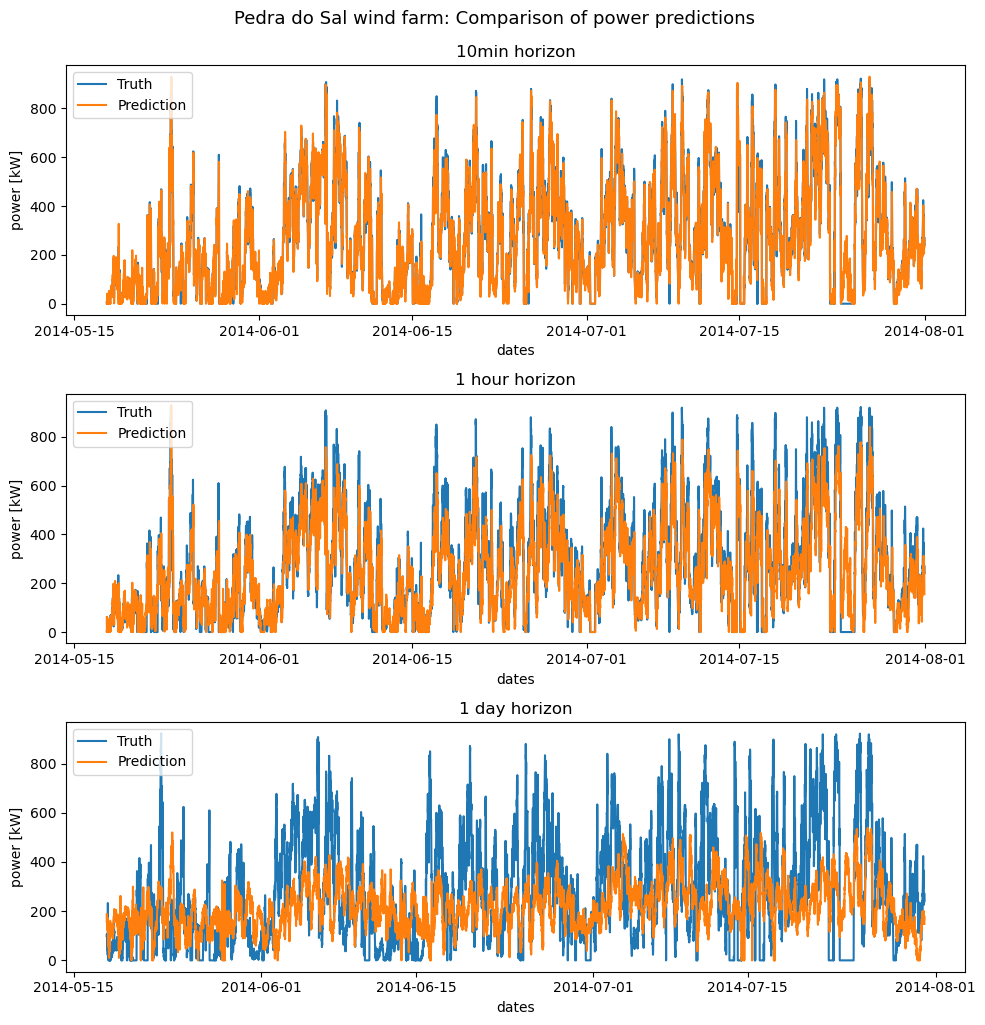

In [6]:
visualizations.plot_models("Pedra do Sal", models)